In [60]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from scipy import stats

In [112]:
data_path = 'Data/FICO_case_HTW2025'
data_size = '2500'

# Read and Clean the Data

In [113]:
df_info = pd.read_csv(f'{data_path}/data{data_size}/shares{data_size}.csv')
df_info = df_info.T
df_info.columns = df_info.loc['Stock']
df_info = df_info.drop('Stock', axis=0)

df_price = pd.read_csv(f'{data_path}/data{data_size}/stockprices{data_size}.csv')
df_price = df_price.T
df_price.columns = df_price.loc['Stock']
df_price = df_price.drop('Stock', axis=0)
df_price = df_price.reset_index(drop=True)
df_price = df_price.astype(float)

df_return = np.log(df_price / df_price.shift(1)).dropna()

display(df_info)
display(df_price)
display(df_return)

Stock         Stock_1     Stock_2         Stock_3  Stock_4  Stock_5 Stock_6  \
Return         0.1598      0.2018          0.0883   0.2048   0.0818  0.0676   
Sector     Healthcare  Technology  Consumer Goods  Finance  Finance  Energy   
ESG score        73.0        95.0            63.0     68.0     65.0    43.0   

Stock         Stock_7     Stock_8      Stock_9    Stock_10  ...  Stock_2491  \
Return         0.1445      0.0265       0.0196      0.0774  ...      0.0581   
Sector     Healthcare  Healthcare  Real Estate  Technology  ...  Healthcare   
ESG score       103.0        68.0         58.0        66.0  ...        86.0   

Stock      Stock_2492   Stock_2493      Stock_2494 Stock_2495   Stock_2496  \
Return         0.1472       0.0669          0.0889     0.0877       -0.087   
Sector     Healthcare  Real Estate  Consumer Goods  Utilities  Industrials   
ESG score        73.0         71.0            66.0       89.0         55.0   

Stock       Stock_2497 Stock_2498  Stock_2499  Stock_2500  
Return           0.052     0.0537      0.2069      0.1785  
Sector     Industrials  Utilities  Technology  Healthcare  
ESG score         54.0       70.0       111.0        65.0  

[3 rows x 2500 columns]

Stock  Stock_1  Stock_2  Stock_3  Stock_4  Stock_5  Stock_6  Stock_7  Stock_8  \
0        49.96    98.40    79.64    86.31    79.29    34.18    31.67    96.26   
1        45.09    93.75    84.19    96.99    76.73    34.86    32.76   106.27   
2        46.39   115.85    78.91   100.70    66.46    35.54    31.50   105.30   
3        47.56   128.43    75.66   112.58    77.19    34.94    32.11   101.22   
4        51.83   128.70    83.28   126.15    73.52    34.71    35.46   100.06   
...        ...      ...      ...      ...      ...      ...      ...      ...   
4995      1.23     1.02    10.04     1.74     1.01     1.37     1.40    20.34   
4996      1.37     1.20    10.17     2.13     1.06     1.37     1.54    19.60   
4997      1.33     1.06    10.19     1.31     1.12     1.37     1.58    19.00   
4998      1.47     1.22    11.02     1.42     1.03     1.17     1.43    18.36   
4999      1.45     1.08    10.47     1.29     1.00     1.07     1.37    18.75   

Stock  Stock_9  Stock_10  ...  Stock_2491  Stock_2492  Stock_2493  Stock_2494  \
0        21.93     57.85  ...       57.38       58.10       50.46       64.64   
1        20.00     58.30  ...       58.86       59.69       53.79       67.74   
2        18.86     63.61  ...       60.39       73.97       49.45       64.37   
3        20.49     59.34  ...       62.99       80.90       45.04       67.45   
4        19.78     65.51  ...       63.44       71.27       43.23       60.25   
...        ...       ...  ...         ...         ...         ...         ...   
4995      1.13      6.45  ...        1.00       20.16        1.25        1.00   
4996      1.13      5.07  ...        1.01       19.49        1.38        1.00   
4997      1.10      5.10  ...        1.04       18.73        1.42        1.07   
4998      1.09      5.09  ...        1.08       19.67        1.40        1.12   
4999      1.02      5.31  ...        1.04       18.77        1.34        1.23   

Stock  Stock_2495  Stock_2496  Stock_2497  Stock_2498  Stock_2499  Stock_2500  
0           89.71       84.03       48.23       94.51       29.59       64.17  
1           84.32       99.96       47.98       91.66       25.94       68.19  
2           90.25       98.09       43.14       91.37       28.39       73.83  
3           91.34       80.81       44.50       96.76       24.35       80.55  
4           85.25       82.83       43.91       89.13       31.62       83.84  
...           ...         ...         ...         ...         ...         ...  
4995         1.44        2.24        1.44        2.49        1.33        1.64  
4996         1.34        2.32        1.36        2.83        1.18        1.98  
4997         1.15        2.66        1.30        2.70        1.00        2.01  
4998         1.12        2.26        1.07        2.62        1.00        1.84  
4999         1.29        2.59        1.00        2.16        1.09        1.81  

[5000 rows x 2500 columns]

Stock   Stock_1   Stock_2   Stock_3   Stock_4   Stock_5   Stock_6   Stock_7  \
1     -0.102562 -0.048409  0.055560  0.116662 -0.032819  0.019699  0.033838   
2      0.028423  0.211665 -0.064768  0.037538 -0.143693  0.019319 -0.039221   
3      0.024908  0.103088 -0.042058  0.111518  0.149670 -0.017027  0.019180   
4      0.085977  0.002100  0.095959  0.113808 -0.048712 -0.006604  0.099238   
5     -0.051872 -0.034706  0.007775  0.131369  0.152478  0.070087  0.031370   
...         ...       ...       ...       ...       ...       ...       ...   
4995   0.111704  0.019803  0.037549  0.182322  0.009950 -0.035846  0.105361   
4996   0.107797  0.162519  0.012865  0.202237  0.048319  0.000000  0.095310   
4997  -0.029632 -0.124053  0.001965 -0.486095  0.055060  0.000000  0.025642   
4998   0.100083  0.140582  0.078305  0.080630 -0.083770 -0.157807 -0.099750   
4999  -0.013699 -0.121890 -0.051198 -0.096015 -0.029559 -0.089345 -0.042864   

Stock   Stock_8   Stock_9  Stock_10  ...  Stock_2491  Stock_2492  Stock_2493  \
1      0.098930 -0.092123  0.007749  ...    0.025466    0.026999    0.063907   
2     -0.009170 -0.058689  0.087169  ...    0.025662    0.214495   -0.084126   
3     -0.039517  0.082894 -0.069487  ...    0.042152    0.089554   -0.093411   
4     -0.011526 -0.035266  0.098919  ...    0.007119   -0.126738   -0.041016   
5      0.038429  0.028901 -0.005050  ...    0.064992   -0.031645    0.073348   
...         ...       ...       ...  ...         ...         ...         ...   
4995   0.014859 -0.060104  0.123614  ...    0.000000   -0.078210   -0.023717   
4996  -0.037060  0.000000 -0.240739  ...    0.009950   -0.033799    0.098940   
4997  -0.031091 -0.026907  0.005900  ...    0.029270   -0.039775    0.028573   
4998  -0.034265 -0.009132 -0.001963  ...    0.037740    0.048968   -0.014185   
4999   0.021019 -0.066375  0.042314  ...   -0.037740   -0.046835   -0.043803   

Stock  Stock_2494  Stock_2495  Stock_2496  Stock_2497  Stock_2498  Stock_2499  \
1        0.046843   -0.061963    0.173596   -0.005197   -0.030620   -0.131650   
2       -0.051029    0.067965   -0.018885   -0.106334   -0.003169    0.090251   
3        0.046739    0.012005   -0.193785    0.031039    0.057316   -0.153505   
4       -0.112884   -0.069001    0.024690   -0.013347   -0.082138    0.261258   
5        0.071259   -0.002819   -0.017907    0.021182    0.043256   -0.110222   
...           ...         ...         ...         ...         ...         ...   
4995    -0.104360    0.117783   -0.060625   -0.006920    0.083731    0.038319   
4996     0.000000   -0.071973    0.035091   -0.057158    0.127994   -0.119665   
4997     0.067659   -0.152908    0.136759   -0.045120   -0.047025   -0.165514   
4998     0.045670   -0.026433   -0.162961   -0.194706   -0.030077    0.000000   
4999     0.093685    0.141314    0.136293   -0.067659   -0.193066    0.086178   

Stock  Stock_2500  
1        0.060762  
2        0.079467  
3        0.087113  
4        0.040032  
5       -0.112222  
...           ...  
4995    -0.076283  
4996     0.188401  
4997     0.015038  
4998    -0.088369  
4999    -0.016439  

[4999 rows x 2500 columns]

### Missing Value

In [115]:
if df_price.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print('There are NO missing values in the DataFrame.')
    

There are NO missing values in the DataFrame.


# Explre the Data

In [74]:
display(df_price.describe())
display(df_return.describe())

Stock      Stock_1      Stock_2      Stock_3      Stock_4      Stock_5  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     29.758716     7.332136    19.231212     5.039844     6.403872   
std      92.367214    21.153411    29.006844     9.183077    16.407813   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.370000     1.220000     1.620000     1.380000     1.290000   
50%       1.990000     1.785000     5.070000     2.250000     2.080000   
75%       8.922500     3.720000    23.772500     5.152500     4.692500   
max     776.300000   226.620000   162.540000   156.660000   171.560000   

Stock      Stock_6      Stock_7      Stock_8      Stock_9     Stock_10  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean     24.424496    12.772584     8.596332    10.108016    18.145272  ...   
std      37.668862    18.918317    16.664829    14.962085    47.292905  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       1.400000     1.340000     2.110000     1.930000     1.670000  ...   
50%       3.025000     2.460000     4.870000     3.550000     3.660000  ...   
75%      35.122500    16.212500     7.560000     8.610000     8.000000  ...   
max     186.520000   105.340000   125.160000    93.810000   403.600000  ...   

Stock   Stock_2491   Stock_2492   Stock_2493   Stock_2494   Stock_2495  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     17.420454    15.538840    49.724396    15.595566     8.774728   
std      23.139675    31.302266   108.438357    44.791272    15.594185   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.180000     1.540000     2.160000     1.180000     1.340000   
50%       6.335000     2.980000     5.055000     1.570000     2.430000   
75%      24.332500    15.772500    36.515000     2.780000     7.412500   
max     133.540000   248.290000   932.540000   296.500000   104.180000   

Stock   Stock_2496   Stock_2497   Stock_2498   Stock_2499   Stock_2500  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean     30.955436     5.425362    69.571436     8.577726    28.414468  
std      90.260492     7.346548   132.034315    20.772200    46.288349  
min       1.000000     1.000000     1.000000     1.000000     1.000000  
25%       1.180000     1.320000     1.400000     1.430000     2.080000  
50%       1.730000     2.090000     3.110000     2.670000     6.970000  
75%       4.250000     5.710000    65.897500     6.092500    32.797500  
max     789.050000    51.330000   808.420000   226.910000   407.010000  

[8 rows x 2500 columns]

Stock      Stock_1      Stock_2      Stock_3      Stock_4      Stock_5  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean     -0.000708    -0.000903    -0.000406    -0.000841    -0.000875   
std       0.085588     0.141736     0.068595     0.175243     0.104218   
min      -0.366463    -0.828159    -0.327901    -1.060872    -0.459953   
25%      -0.055518    -0.083316    -0.044784    -0.104360    -0.066691   
50%       0.000000     0.000000     0.000744     0.004640     0.000000   
75%       0.058454     0.095310     0.047016     0.121327     0.069575   
max       0.261058     0.420733     0.215771     0.590578     0.342568   

Stock      Stock_6      Stock_7      Stock_8      Stock_9     Stock_10  ...  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000  ...   
mean     -0.000693    -0.000628    -0.000327    -0.000614    -0.000478  ...   
std       0.066469     0.081499     0.041862     0.060444     0.084998  ...   
min      -0.266629    -0.426280    -0.160650    -0.254738    -0.333592  ...   
25%      -0.043552    -0.052803    -0.028534    -0.040741    -0.052198  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.045390     0.054177     0.028304     0.041322     0.055945  ...   
max       0.223144     0.306803     0.132821     0.188901     0.244895  ...   

Stock   Stock_2491   Stock_2492   Stock_2493   Stock_2494   Stock_2495  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean     -0.000802    -0.000226    -0.000726    -0.000793    -0.000849   
std       0.055065     0.082896     0.084277     0.066367     0.080370   
min      -0.228915    -0.343590    -0.403131    -0.255525    -0.299658   
25%      -0.037124    -0.053724    -0.053572    -0.042200    -0.052071   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.037073     0.057547     0.056452     0.044452     0.053854   
max       0.202124     0.272183     0.262053     0.210190     0.255594   

Stock   Stock_2496   Stock_2497   Stock_2498   Stock_2499   Stock_2500  
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000  
mean     -0.000696    -0.000775    -0.000756    -0.000660    -0.000714  
std       0.099324     0.082000     0.064123     0.144618     0.094513  
min      -0.459178    -0.313637    -0.246297    -0.912691    -0.400302  
25%      -0.061571    -0.052083    -0.042959    -0.089280    -0.061633  
50%       0.000000     0.000000     0.000000     0.000000     0.002907  
75%       0.066823     0.055570     0.042560     0.098646     0.065788  
max       0.287682     0.242313     0.209703     0.475377     0.305251  

[8 rows x 2500 columns]

In [110]:
mu_daily = df_return.mean(axis=0)
sig_daily = df_return.std(axis=0, ddof=1)
mu_ann = mu_daily * 252.0
sig_ann = sig_daily * np.sqrt(252.0)
skew_daily = df_return.skew(axis=0)
kurt_daily = df_return.kurtosis(axis=0)
jb_stat, jb_p = stats.jarque_bera(df_return.fillna(0))

summary = pd.DataFrame({
    "ESG": df_info.loc['ESG score'],
    "Sector": df_info.loc['Sector'],
    "mu_daily": mu_daily,
    "sigma_daily": sig_daily,
    "mu_ann": mu_ann,
    "sigma_ann": sig_ann,
    "skew": skew_daily,
    "kurtosis": kurt_daily,
})

display(summary)
display(summary.sort_values(by="ESG", ascending=False))

ESG          Sector  mu_daily  sigma_daily    mu_ann  sigma_ann  \
Stock                                                                           
Stock_1      73.0      Healthcare -0.000708     0.085588 -0.178435   1.358668   
Stock_2      95.0      Technology -0.000903     0.141736 -0.227454   2.249989   
Stock_3      63.0  Consumer Goods -0.000406     0.068595 -0.102282   1.088904   
Stock_4      68.0         Finance -0.000841     0.175243 -0.211889   2.781894   
Stock_5      65.0         Finance -0.000875     0.104218 -0.220449   1.654407   
...           ...             ...       ...          ...       ...        ...   
Stock_2496   55.0     Industrials -0.000696     0.099324 -0.175403   1.576718   
Stock_2497   54.0     Industrials -0.000775     0.082000 -0.195389   1.301711   
Stock_2498   70.0       Utilities -0.000756     0.064123 -0.190479   1.017914   
Stock_2499  111.0      Technology -0.000660     0.144618 -0.166417   2.295743   
Stock_2500   65.0      Healthcare -0.000714     0.094513 -0.179874   1.500350   

                skew  kurtosis  
Stock                           
Stock_1    -0.274051  0.283506  
Stock_2    -0.423783  0.692937  
Stock_3    -0.265978  0.269662  
Stock_4    -0.567903  1.035109  
Stock_5    -0.310795  0.324980  
...              ...       ...  
Stock_2496 -0.274000  0.245588  
Stock_2497 -0.308889  0.288440  
Stock_2498 -0.217267  0.093078  
Stock_2499 -0.452352  0.810176  
Stock_2500 -0.307125  0.230503  

[2500 rows x 8 columns]

ESG       Sector  mu_daily  sigma_daily    mu_ann  sigma_ann  \
Stock                                                                        
Stock_1976  198.0       Energy -0.000392     0.095642 -0.098659   1.518268   
Stock_817   190.0      Finance -0.000833     0.099730 -0.209807   1.583167   
Stock_61    187.0       Energy -0.000555     0.098091 -0.139786   1.557150   
Stock_119   186.0       Energy -0.000799     0.055892 -0.201282   0.887254   
Stock_126   184.0   Healthcare -0.000491     0.052592 -0.123764   0.834879   
...           ...          ...       ...          ...       ...        ...   
Stock_1937    NaN   Healthcare -0.000061     0.055499 -0.015287   0.881023   
Stock_2052    NaN   Healthcare -0.000237     0.104627 -0.059804   1.660896   
Stock_2243    NaN      Finance -0.000908     0.117333 -0.228727   1.862607   
Stock_2403    NaN  Real Estate -0.000719     0.069162 -0.181266   1.097916   
Stock_2461    NaN       Energy -0.000574     0.123578 -0.144589   1.961744   

                skew  kurtosis  
Stock                           
Stock_1976 -0.333740  0.327763  
Stock_817  -0.385145  0.339322  
Stock_61   -0.322252  0.380072  
Stock_119  -0.133115  0.050660  
Stock_126  -0.144954  0.050725  
...              ...       ...  
Stock_1937 -0.160223  0.205408  
Stock_2052 -0.300322  0.204143  
Stock_2243 -0.436512  0.621434  
Stock_2403 -0.216238  0.148235  
Stock_2461 -0.559967  1.023410  

[2500 rows x 8 columns]

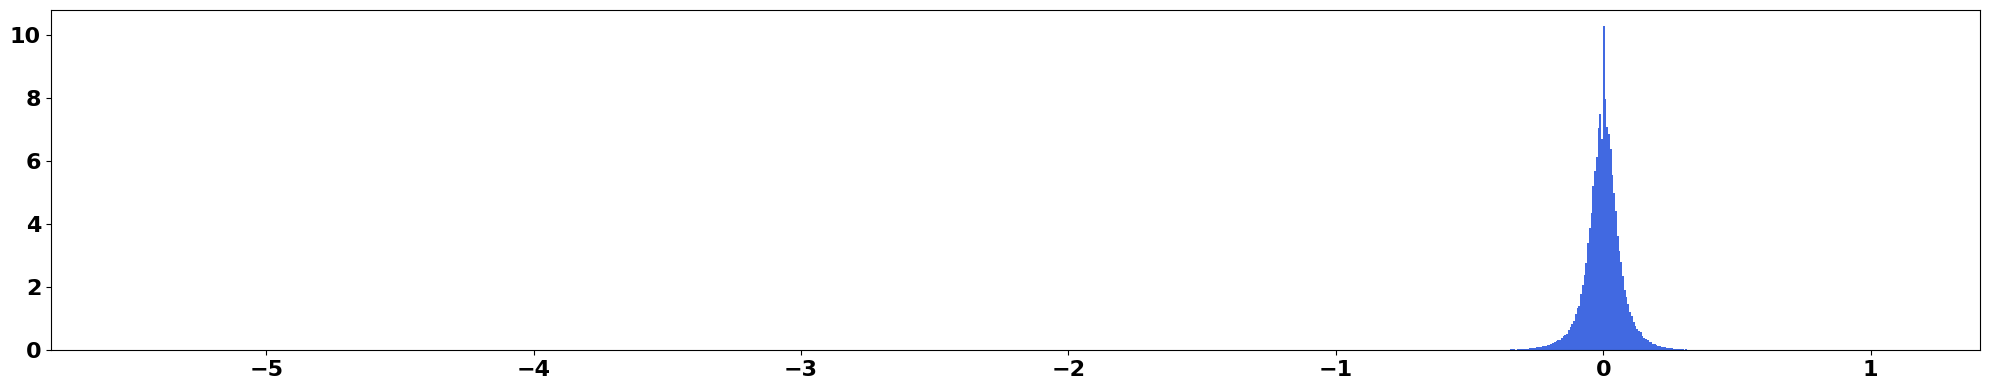

In [50]:
plt.figure(figsize=(20, 4))
plt.hist(df_return.values.ravel(), bins=1000, density=True, color='royalblue')
plt.xticks(fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

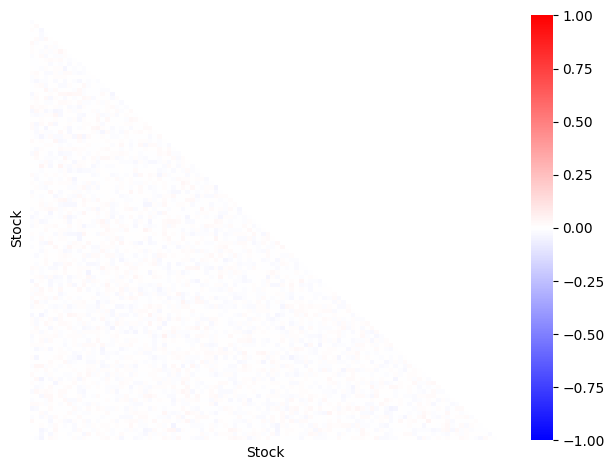

In [58]:
df_corr = df_return.corr()
df_cov = df_return.cov()

mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure()
sns.heatmap(df_corr, cmap='bwr', center=0, fmt='.2f', xticklabels=False, yticklabels=False, mask=mask, annot=False, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

### Sector

In [105]:
df_sector = df_info.iloc[1, :].unique().tolist()
(df_info.T).groupby(['Sector']).mean()

Return  ESG score
Sector                             
Consumer Goods  0.096412  65.851266
Energy          0.101908  52.160535
Finance         0.124745  61.157895
Healthcare      0.130713   76.17757
Industrials      0.06675   47.26506
Real Estate     0.061722  55.402516
Technology      0.149761  80.125461
Utilities       0.088806  70.729299

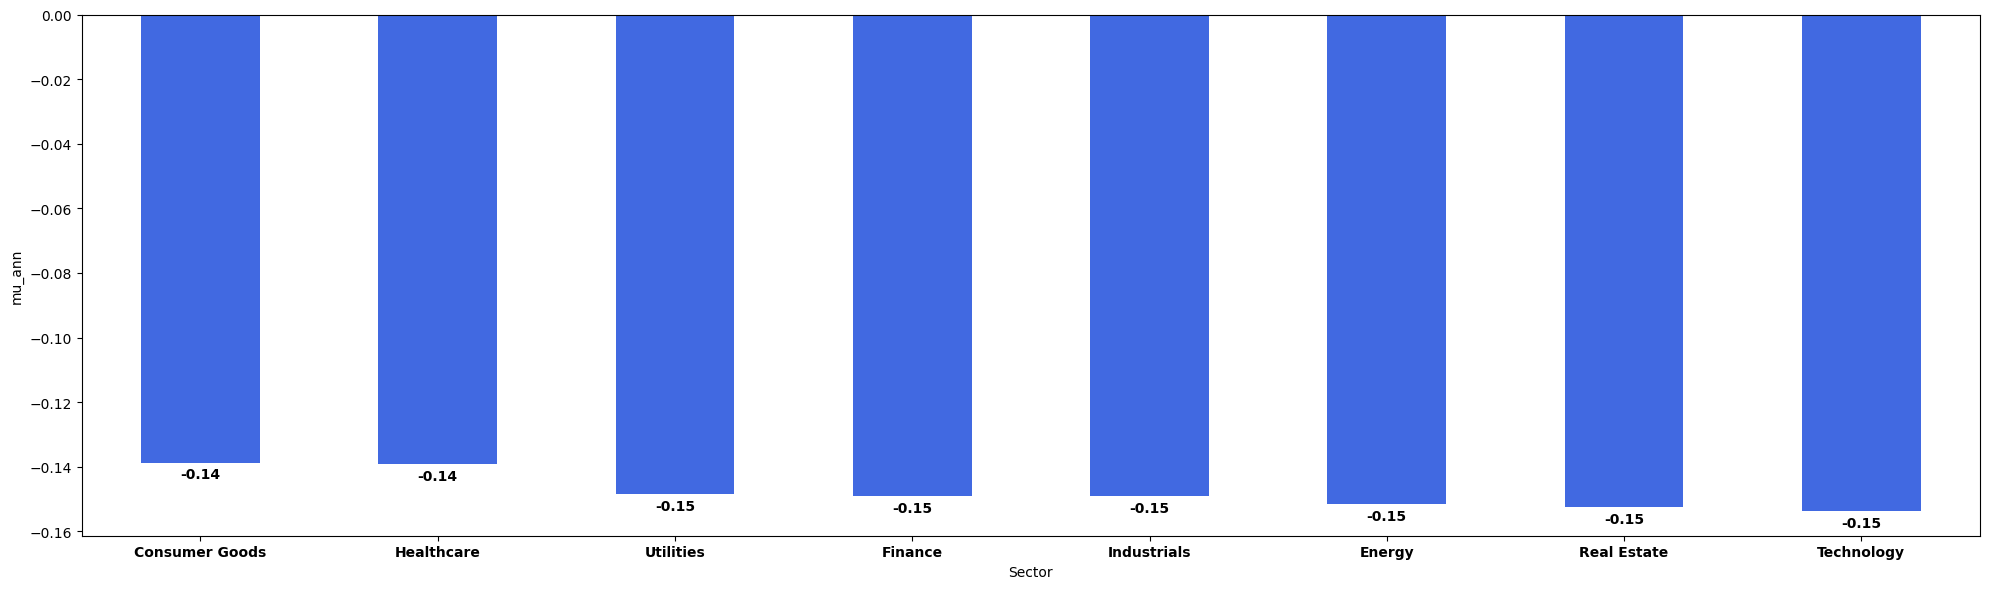

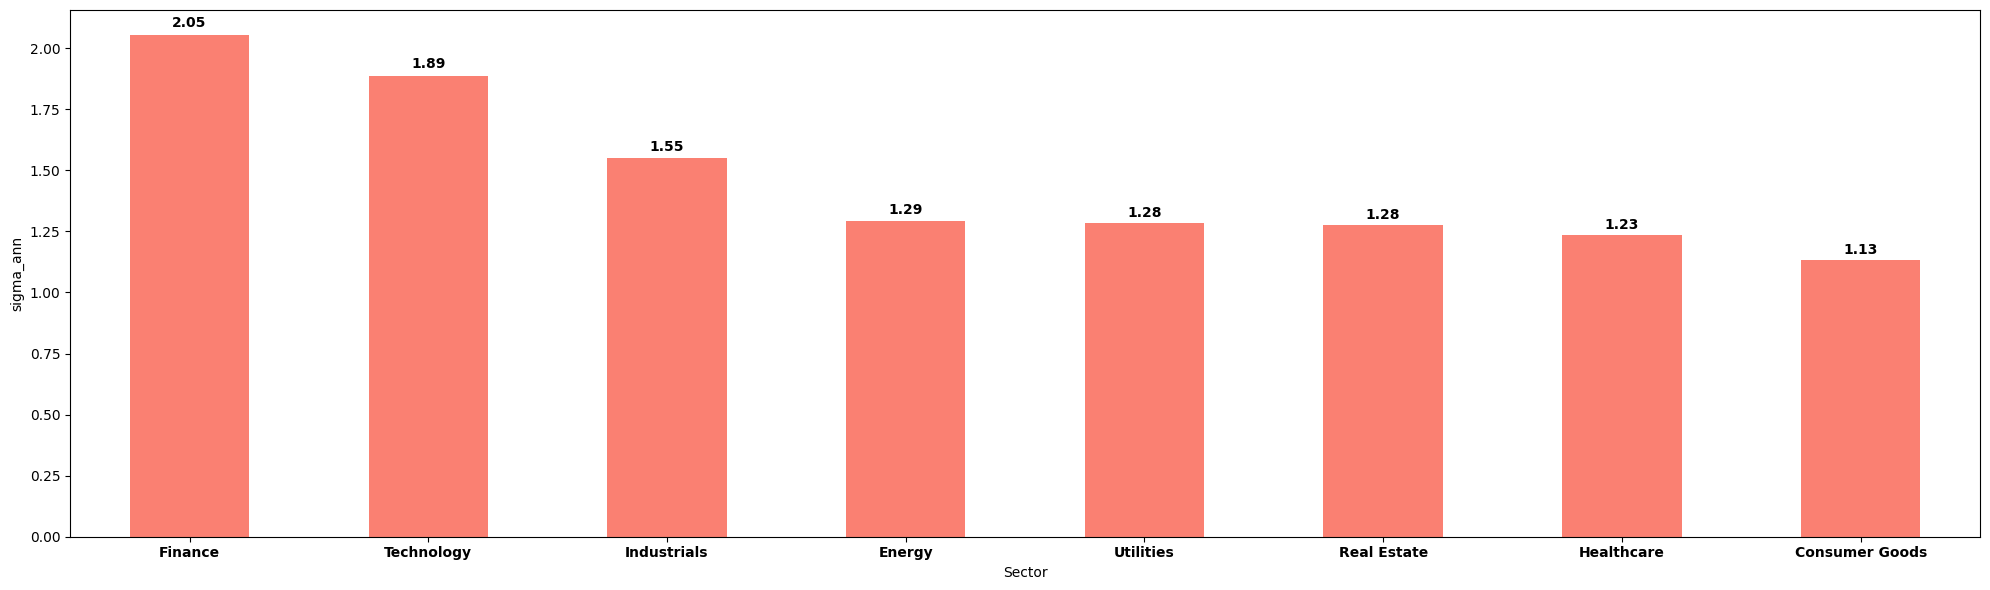

In [ ]:
summary = pd.DataFrame({
    "ESG": df_info.loc['ESG score'],
    "Sector": df_info.loc['Sector'],
    "mu_daily": mu_daily,
    "sigma_daily": sig_daily,
    "mu_ann": mu_ann,
    "sigma_ann": sig_ann,
    "skew": skew_daily,
    "kurtosis": kurt_daily,
})

g_mu = summary.groupby("Sector")["mu_ann"].mean().sort_values(ascending=False)
g_sig = summary.groupby("Sector")["sigma_ann"].mean().sort_values(ascending=False)


# mu_ann

plt.figure(figsize=(20, 6))
ax = g_mu.plot(kind="bar", color="royalblue")
plt.ylabel("mu_ann")

for p in ax.patches:
    value = p.get_height()
    if value >= 0:
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold')
    else:
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="top", fontsize=10, fontweight='bold')

plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


# sigma_ann

plt.figure(figsize=(20, 6))
ax = g_sig.plot(kind="bar", color="salmon")
plt.ylabel("sigma_ann")

for p in ax.patches:
    value = p.get_height()
    if value >= 0:
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold')
    else:
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="top", fontsize=10, fontweight='bold')

plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()
